# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

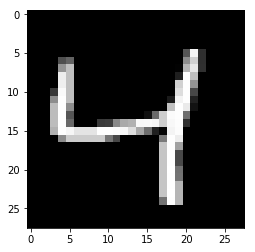

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 784), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 784), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost) 

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6783
Epoch: 1/20... Training loss: 0.6721
Epoch: 1/20... Training loss: 0.6651
Epoch: 1/20... Training loss: 0.6574
Epoch: 1/20... Training loss: 0.6467
Epoch: 1/20... Training loss: 0.6367
Epoch: 1/20... Training loss: 0.6235
Epoch: 1/20... Training loss: 0.6103
Epoch: 1/20... Training loss: 0.5955
Epoch: 1/20... Training loss: 0.5797
Epoch: 1/20... Training loss: 0.5600
Epoch: 1/20... Training loss: 0.5454
Epoch: 1/20... Training loss: 0.5284
Epoch: 1/20... Training loss: 0.5101
Epoch: 1/20... Training loss: 0.4907
Epoch: 1/20... Training loss: 0.4725
Epoch: 1/20... Training loss: 0.4547
Epoch: 1/20... Training loss: 0.4352
Epoch: 1/20... Training loss: 0.4275
Epoch: 1/20... Training loss: 0.4128
Epoch: 1/20... Training loss: 0.3937
Epoch: 1/20... Training loss: 0.3927
Epoch: 1/20... Training loss: 0.3697
E

Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1791
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1833
E

Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1484
E

Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1329
E

Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1206
E

Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1134
E

Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1066
E

Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1025
E

Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1024
E

Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0974
E

Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0915
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0981
E

Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0920
E

Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.1003
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0990
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0932


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

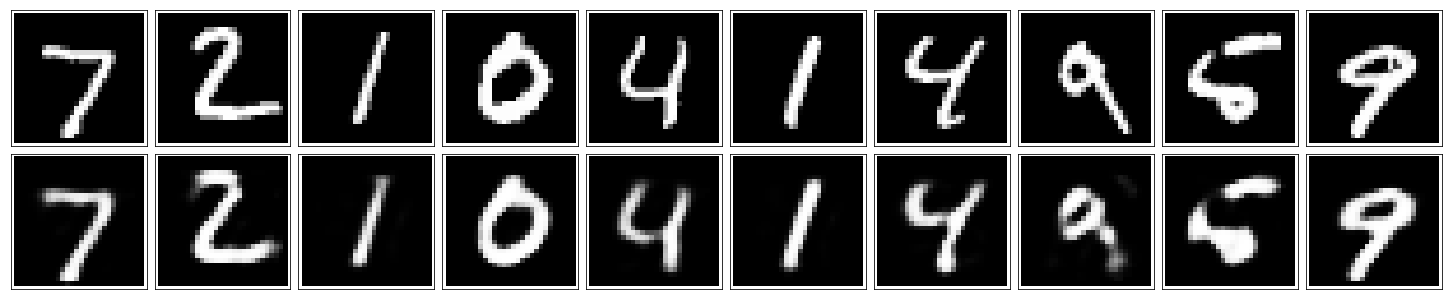

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.